<a href="https://colab.research.google.com/github/ferranlarroyaub/RN-DL/blob/main/07MAIR_VC02_VC03_Introducci%C3%B3n_a_Deep_Learning_Practica_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NUESTRA PRIMERA RED NEURONAL: MNIST DATASET**

Inspeccionar liberrías y versiones en el entorno de Google Colab

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.14.0.37.22
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==1.42.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confe

Importar liberías más importantes y ver versión.

In [ ]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

2.18.0


#### **- Cargando el conjunto de datos**

In [ ]:
# Importamos el dataset MNIST y cargamos los datos

# data set mnis --> 10 digitos (imágenes) que hay que clasificar
# aplanaremos los datos trabajando con vectores

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Inspección de los datos originales
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


# Inspeccionar y_test
print(np.unique(y_test))
print(np.bincount(y_test)/sum(np.bincount(y_test)))  # para ver el balanceo de los datos de test (por ejemplo digito 1 tiene mas muestras)
print(y_test[0:20])



# Si aplanamos las imagenes, la dimension de cada muestra sera  de (1, 28, 28). Cada pixel sera 1 caracteristica
# imagenemos un cuadrado en 2-D de 28x28. Pues cada pixel de dentro sera una 1 caracteristica del vector
# para una capa de nuestra red, cada neurona tendra como input cada uno de los valores de las caracteristicas del vector x(i).
# fully connected/capas densas --> todas las neuronas de la capa estan conectadas con todos los valores de entrada
# output con sigmoide.

# En este caso es un problema de clasificación. Como podemos modelar a que digito pertenece? --> ponemos 10 neuronas de salida! (tantos como digitos hay posibles, 10)
# cada salida (cada neurona), tendra un vector one-hot-encoding correspondiente

# queremos que los valores de salida sumen uno --> funcion de salida SOFTMAX! (en vez de sigmoide)  ---> softmax(1) = e^z1 / sum(e^zi)
# ex: [0,0,0.2,0.8,0,0,0,0,0]

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[0 1 2 3 4 5 6 7 8 9]
[0.098  0.1135 0.1032 0.101  0.0982 0.0892 0.0958 0.1028 0.0974 0.1009]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


#### **- Inspeccionando el conjunto de datos**

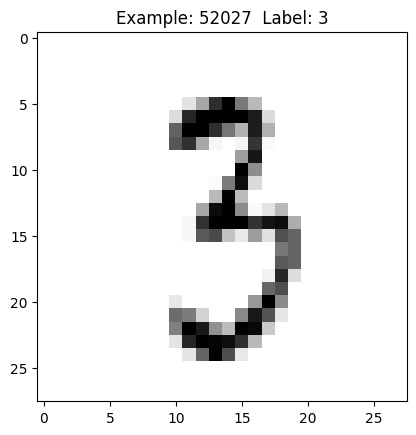

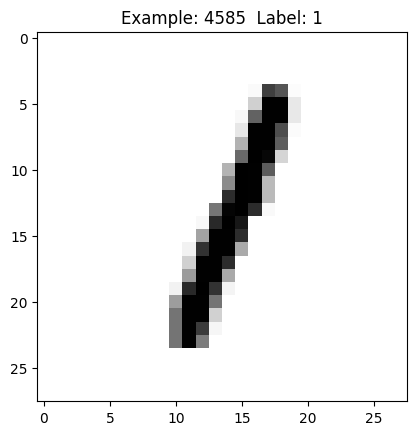

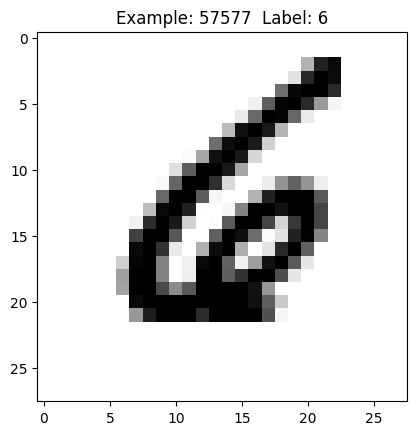

In [ ]:
import matplotlib.pyplot as plt
# Función auxiliar para visualizar datos de entrenamiento de manera aleatoria
def display_digit(num):
  # Seleccionar la imagen num de mnist.train.images y hacer un reshape al tamaño de la imagen
  image = X_train[num,:,:]

  # Seleccionar el target num de mnist.train.labels
  label = y_train[num]

  # Mostrar
  plt.title('Example: %d  Label: %d' % (num, label))
  plt.imshow(image, cmap=plt.get_cmap('gray_r'))
  plt.show()

# Mostramos algunos ejemplos
display_digit(np.random.randint(0, X_train.shape[0]))
display_digit(np.random.randint(0, X_train.shape[0]))
display_digit(np.random.randint(0, X_train.shape[0]))

#### **- Acondicionando el conjunto de datos**

In [ ]:
# Pre-procesado obligatorio cuando trabajo con redes neuronales
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Estandarizar los datos
X_train_n, X_test_n = X_train/255., X_test/255.

# Pasar las etiquetas a one-hot-encoding
y_train_ohe = to_categorical(y_train, num_classes=10)
y_test_ohe = to_categorical(y_test, num_classes=10)

print(y_train_ohe.shape)
print(y_test_ohe.shape)
print(y_test_ohe[100,:])

# Partición: train to train + val
X_train_n_tr, X_train_n_val, y_train_ohe_tr, y_train_ohe_val = train_test_split(X_train_n,
                            y_train_ohe, test_size = 0.15, random_state = 42)

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [ ]:
# Imports necesitados
# (import sequencial)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Arquitectura
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(512, activation = 'relu'))  # activación intermedia
model.add(Dense(10, activation = 'softmax')) # capa salida: softmax para classifacion (regression no softmax)

# Printear modelo
model.summary()


# PREGUNTA EXAMEN:  SIN VER SUMMARY, CUANTOS PARAMETROS TIENE LA PRIMERA CAPA DENSA?
# Entrada: al aplanar 28x28 nos queda un vector de 784 elementos (0 parametros)
# 1a capa densa: Le ponemos 512 neuronas, cada una de las cuales recibira los 784 inputs --> 512x718 = 401,408
# Le añadimos el bias (f(x)= a·x + b) por lo tanto debemos sumar 512 elementos más --> # param = 401,920
# La capa de salida tendrá: 10 x 512 + 10 = 5,130 parámetros (le llegan 512 inputs de la capa densa y tiene 10 neuronas)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Optimizador
from tensorflow.keras.optimizers import SGD,Adam

# Init optimizer
lr = 0.005
opt = SGD(lr, momentum = 0.9)

In [ ]:
# Compilar: acoplamos la arquitectura, la función de coste y optimizador
model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ["accuracy"])

# Funciones de coste:
# REGRESIÓN: MSE
# CLASIFICACIÓN: binary_crossentropy (1 clase binaria salida), categorical_crossentropy (multiclase)
# cce = sum_{batch} - sum_{categories} (log(softmax(k)))*y_{k}
# bce = sum_{batch} - sum_{categories} (log(softmax(k)))*y_{k} + (1-log(softmax(k)))*(1-y_{k})



In [ ]:
# Entrenamiento
epochs, batch_size = 50, 128
H = model.fit(X_train_n_tr, y_train_ohe_tr, validation_data = (X_train_n_val, y_train_ohe_val),
              epochs = epochs, batch_size = batch_size)

Epoch 1/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7157 - loss: 1.0403 - val_accuracy: 0.9039 - val_loss: 0.3550
Epoch 2/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9074 - loss: 0.3378 - val_accuracy: 0.9194 - val_loss: 0.2887
Epoch 3/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9207 - loss: 0.2784 - val_accuracy: 0.9290 - val_loss: 0.2527
Epoch 4/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9320 - loss: 0.2442 - val_accuracy: 0.9334 - val_loss: 0.2306
Epoch 5/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9392 - loss: 0.2183 - val_accuracy: 0.9426 - val_loss: 0.2083
Epoch 6/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9447 - loss: 0.2037 - val_accuracy: 0.9473 - val_loss: 0.1915
Epoch 7/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9494 - loss: 0.1835 - val_accuracy: 0.9507 - val_loss: 0.1798
Epoch 8/50
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9530 - loss: 0.1670 - val_accuracy: 0.

#### **- Observando el proceso de entrenamiento para tomar decisiones**

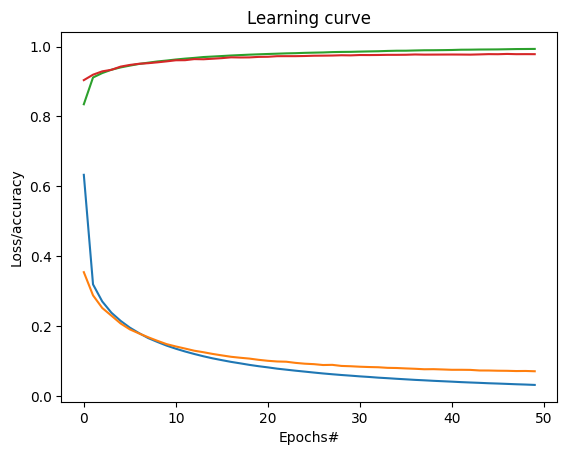

In [ ]:
# Muestro gráfica de accuracy y losses
def visualiza_learning_curve(H):
  plt.figure()
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["loss"])
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["val_loss"])
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["accuracy"])
  plt.plot(np.arange(0, len(H.history["loss"])), H.history["val_accuracy"])

  plt.title("Learning curve")
  plt.xlabel("Epochs#")
  plt.ylabel("Loss/accuracy")

visualiza_learning_curve(H)

#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
from sklearn.metrics import classification_report

yhat_test = model.predict(X_test_n)
print(yhat_test.shape)

print(classification_report(np.argmax(y_test_ohe, -1), np.argmax(yhat_test, -1)))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



--------------------------------------------------------------------------

## **MLP APLICADO A TEXTO: EJEMPLO REUTERS**

#### **- Cargando el conjunto de datos**

In [ ]:
import numpy as np
import tensorflow as tf
# Importamos el dataset REUTERS y cargamos los datos
reuters = tf.keras.datasets.reuters
WORD_LIMIT = 10000
(training_data, training_labels), (testing_data, testing_labels) = reuters.load_data(num_words=WORD_LIMIT)
print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)

#### **- Inspeccionando el conjunto de datos**

In [ ]:
# Los datos son numericos para decodificarlos, se puede usar reuters.get_word_index()
word_index = reuters.get_word_index()
reverse_word_index = dict({value : key for key, value in word_index.items()})
decoded = ' '.join(
    [reverse_word_index.get(i-3,'?') for i in training_data[5248]]
)
decoded

#### **- Acondicionando el conjunto de datos**

In [ ]:
# Función auxiliar para representar las palabras (que no entiende nuestra red neuronal) en números
import numpy as np
# one hot encoding del input, vector con cada indice indicando si una palabra esta presente
def one_hot_encode(data):
    encoded = np.zeros((len(data),WORD_LIMIT))
    for i, v in enumerate(data):
        encoded[i,v] = 1 # localiza las columnas del genero correspondiente, marca con 1
    return encoded

In [ ]:
# Convertimos nuestras palabras a números
x_train = one_hot_encode(training_data)
x_test = one_hot_encode(testing_data)
print(x_train.shape)
print(x_test.shape)

#### **- Creando la topología de Red Neuronal (MLP) y entrenándola**

In [ ]:
# Vamos a codificar la topología de nuestro MLP


In [ ]:
# Ahora que tengo definida la arquitectura, la compilo


In [ ]:
# A entrenar nuestra red neuronal sea dicho!


#### **- Observando el proceso de entrenamiento para tomar decisiones**

In [ ]:
# Muestro gráfica de accuracy y losses


#### **- Probando el conjunto de datos en el subset de test y evaluando el performance del modelo**

In [ ]:
# Evaluando el modelo de predicción con las imágenes de test


## **REGULARIZACIÓN EN APRENDIZAJE PROFUNDO**

#### **- Weight regularization L1/L2**

In [ ]:
# Vamos a codificar la topología de nuestro MLP


In [ ]:
# Ahora que tengo definida la arquitectura, la compilo


In [ ]:
# A entrenar nuestra red neuronal sea dicho!


In [ ]:
# Muestro gráfica de accuracy y losses


In [ ]:
# Evaluando el modelo de predicción con las imágenes de test


#### **- Dropout**

In [ ]:
# Vamos a codificar la topología de nuestro MLP


In [ ]:
# Ahora que tengo definida la arquitectura, la compilo


In [ ]:
# A entrenar nuestra red neuronal sea dicho!


In [ ]:
# Muestro gráfica de accuracy y losses


In [ ]:
# Evaluando el modelo de predicción con las imágenes de test


#### **- Batch Normalization**

In [ ]:
# Vamos a codificar la topología de nuestro MLP


In [ ]:
# Ahora que tengo definida la arquitectura, la compilo


In [ ]:
# A entrenar nuestra red neuronal sea dicho!


In [ ]:
# Muestro gráfica de accuracy y losses


In [ ]:
# Evaluando el modelo de predicción con las imágenes de test
